In [16]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb

# Verificar que la GPU está disponible
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU disponible.")
else:
    print("GPU no disponible.")

GPU no disponible.


In [5]:
# Crear la carpeta 'resultados' si no existe
if not os.path.exists('resultados'):
    os.makedirs('resultados')

In [19]:
# Cargar los datos
cleaned_data_path = '../datasets/cleaned_data.csv'
data_all = pd.read_csv(cleaned_data_path)

# Convertir la columna a números, los valores inválidos se convierten en NaN
data_all['EDAD_ALU'] = pd.to_numeric(data_all['EDAD_ALU'], errors='coerce')

# Eliminar las filas con NaN en la columna 'EDAD_ALU'
data_all = data_all.dropna(subset=['EDAD_ALU'])

# Borrar las filas donde la columna 'COD_SEC' sea distinto de 0
data_all = data_all[data_all['COD_SEC'] == 0]  # Solo alumnos de basica y media

# Eliminar la columna 'COD_ENSE'
data_all = data_all.drop(columns=['COD_ENSE'])

# Observar correlacion para hacer mas limpieza
numeric_columns = data_all.select_dtypes(include=np.number).columns
correlacion_all = data_all[numeric_columns].corr()

# Ver correlacion en base a valor a evaluar
correlacion_prom_gral = correlacion_all["PROM_GRAL"].sort_values(
    ascending=False)

# Obtén los nombres de las columnas con correlación mayor a 0.1
columnas_mayor_0_1 = correlacion_prom_gral[correlacion_prom_gral > 0.057].index

# Obtén los nombres de las columnas con correlación menor a -0.1
columnas_menor_neg_0_1 = correlacion_prom_gral[correlacion_prom_gral < -0.05].index

columnas_seleccionadas = columnas_mayor_0_1.tolist() + \
    columnas_menor_neg_0_1.tolist()

# Agregar comuna del colegio
columnas_seleccionadas.append('COD_COM_RBD')
# columnas_seleccionadas.append('DGV_RBD')

# Hacer data = data_all con las columnas a usar EDAD_ALU, GEN_ALU, PROM_GRAL
data_clear = data_all[columnas_seleccionadas]
data = data_clear.drop('FEC_NAC_ALU', axis=1)
data = data.drop('COD_GRADO', axis=1)

C:\Users\Ketbome\AppData\Local\Temp\ipykernel_10448\3891031790.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all = pd.read_csv(cleaned_data_path)


<Axes: >

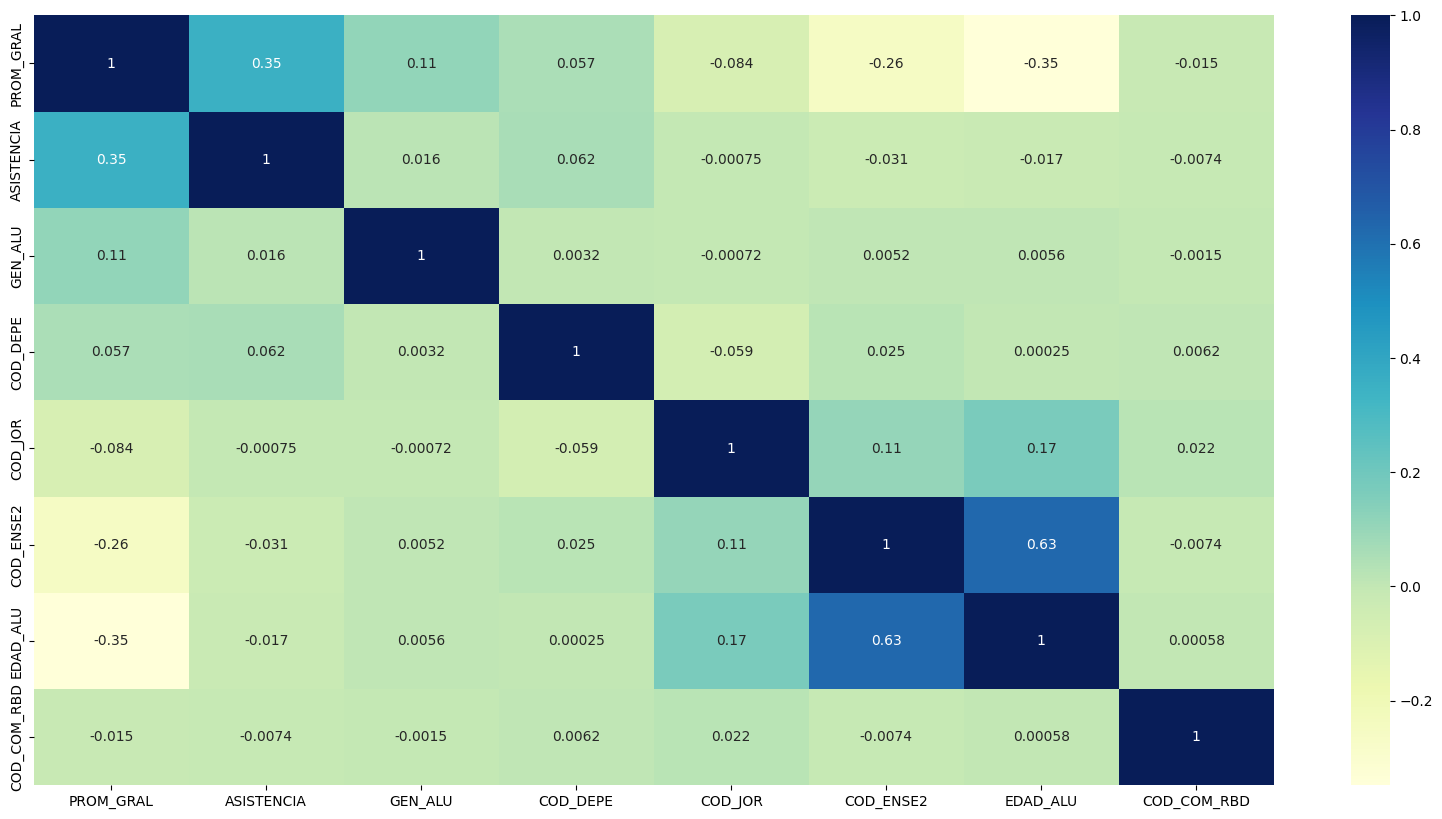

In [20]:
#Observar correlacion para hacer mas limpieza
plt.figure(figsize=(20,10))
sb.heatmap(data.corr(), annot=True, cmap='YlGnBu')


In [21]:
# Ver correlacion en base a valor a evaluar
data.corr()["PROM_GRAL"].sort_values(ascending=False)

PROM_GRAL      1.000000
ASISTENCIA     0.353526
GEN_ALU        0.113676
COD_DEPE       0.057404
COD_COM_RBD   -0.015470
COD_JOR       -0.084066
COD_ENSE2     -0.257659
EDAD_ALU      -0.348045
Name: PROM_GRAL, dtype: float64

In [22]:
# Saber cuantas filas hay y columnas
pd.DataFrame([data.shape], columns=['Filas', 'Columnas'])

,Filas,Columnas
0,2929038,8


In [23]:
# División de datos
X = data.drop(columns=['PROM_GRAL'])
y = data['PROM_GRAL']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Construcción del modelo de red neuronal
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [45]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
pd.DataFrame([X_train.shape], columns=['Filas', 'Columnas'])

,Filas,Columnas
0,2343230,7


In [46]:
# Entrenamiento
model.fit(
    X_train_scaled, 
    y_train, 
    epochs=20,
    batch_size=1024, 
    validation_split=0.2, 
    verbose=1
)

Epoch 1/20
1831/1831 [==============================] - 13s 6ms/step - loss: 0.7974 - mae: 0.5974 - val_loss: 0.3311 - val_mae: 0.4498
Epoch 2/20
1831/1831 [==============================] - 12s 6ms/step - loss: 0.3384 - mae: 0.4435 - val_loss: 0.3321 - val_mae: 0.4540
Epoch 3/20
1831/1831 [==============================] - 12s 6ms/step - loss: 0.3236 - mae: 0.4329 - val_loss: 0.3240 - val_mae: 0.4418
Epoch 4/20
1831/1831 [==============================] - 12s 6ms/step - loss: 0.3175 - mae: 0.4288 - val_loss: 0.3208 - val_mae: 0.4415
Epoch 5/20
1831/1831 [==============================] - 12s 6ms/step - loss: 0.3135 - mae: 0.4261 - val_loss: 0.3163 - val_mae: 0.4356
Epoch 6/20
1831/1831 [==============================] - 12s 6ms/step - loss: 0.3111 - mae: 0.4245 - val_loss: 0.3109 - val_mae: 0.4295
Epoch 7/20
1831/1831 [==============================] - 12s 7ms/step - loss: 0.3097 - mae: 0.4236 - val_loss: 0.3103 - val_mae: 0.4294
Epoch 8/20
1831/1831 [==============================] -

In [ ]:
# Guardar el modelo
model.save("./models/RedNeuronal2.h5")
# Guardar el modelo
model.save("./models/nn_model2")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: ./models/nn_model2\assets


INFO:tensorflow:Assets written to: ./models/nn_model2\assets


In [ ]:
pd.DataFrame([X_test.shape], columns=['Filas', 'Columnas'])

,Filas,Columnas
0,604281,9


In [47]:
y_pred = model.predict(X_test_scaled).flatten()

18307/18307 [==============================] - 37s 2ms/step


In [48]:
# aproximar el valor a 1 digito decimal de y_pred
y_pred = np.round(y_pred, decimals=1)
y_pred

array([6.1, 6.2, 6.5, ..., 6. , 6. , 6. ], dtype=float32)

In [49]:
# Métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.3085850163211252
MAE: 0.43108306067018154
R2: 0.34677388696477107


In [ ]:
# Guardar los resultados
results = pd.DataFrame({'Modelo': ['Neural Network 2'],
                        'MSE': [mse],
                        'MAE': [mae],
                        'R2': [r2]})
results.to_csv('resultados/RedNeuronal2.csv', index=False)
